# Top

In [1]:
# Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom
import finance_utils as fu
#import ystockquote as ysq
#import technical_indicators as ti
import stock_db_mgr as sdm

In [2]:
# Adjust figure size to be bigger:
plt.rcParams['figure.figsize'] = [15, 6]

# Set seaborn plot theme:
sns.set_theme()

# Lesson 7

In [3]:
db = sdm.StockDBMgr('stock_db/test', '2010-01-01')

In [4]:
df = db.get_all_symbol_single_data_item('Close')

In [5]:
df.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,6.526021,109.800003,15.610239,82.284225,88.860367,42.336414
2010-01-05,6.537304,109.699997,15.541497,81.290230,89.095604,42.501717
2010-01-06,6.433319,111.510002,15.149715,80.762177,89.158325,42.869049
2010-01-07,6.421425,110.820000,14.797037,80.482628,89.534714,42.734364
2010-01-08,6.464116,111.370003,14.994298,81.290230,89.832657,42.562935


In [6]:
# Get daily returns (pc = percent)
pc = df.pct_change()
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003905
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004222,-0.003142
2010-01-08,0.006648,0.004963,0.013331,0.010034,0.003328,-0.004012


In [7]:
# To not have na for first value.
pc.iloc[0] = 0.0

In [8]:
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003905
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004222,-0.003142
2010-01-08,0.006648,0.004963,0.013331,0.010034,0.003328,-0.004012


## Histogram

<AxesSubplot:>

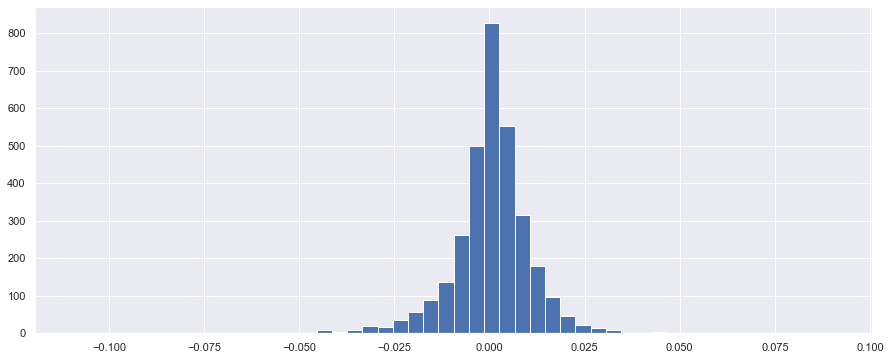

In [9]:
# Basic histogram
pc['SPY'].hist(bins=50)

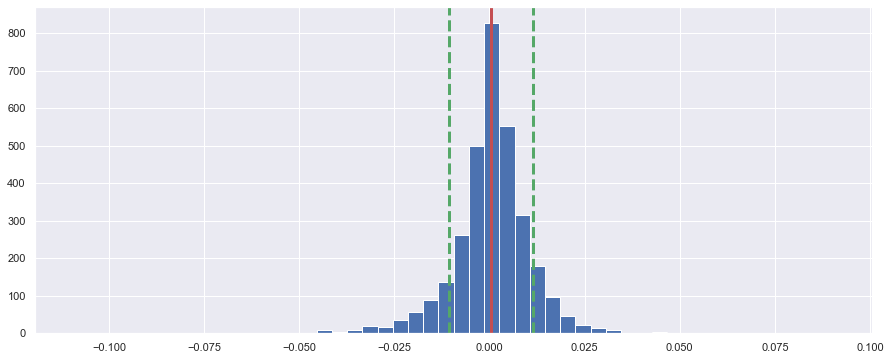

In [10]:
# With std & mean
# TBD bug in lesson: missing std +/- mean.
pc['SPY'].hist(bins=50)
plt.axvline(pc['SPY'].mean(), color='r', linewidth=3)
plt.axvline(pc['SPY'].mean() - pc['SPY'].std(), color='g', linewidth=3, linestyle='dashed')
plt.axvline(pc['SPY'].mean() + pc['SPY'].std(), color='g', linewidth=3, linestyle='dashed')

In [11]:
def plot_histogram(s):
    s.hist(bins=50)
    plt.axvline(s.mean(), color='r', linewidth=3)
    plt.axvline(s.mean() - s.std(), color='g', linewidth=3, linestyle='dashed')
    plt.axvline(s.mean() + s.std(), color='g', linewidth=3, linestyle='dashed')

## Statistical info

Statistics moment:
1. mean
2. std dev
3. skewness: negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right
4. kurtosis: how the tails are thick

In [12]:
desc = df.pct_change().describe()
desc.rename_axis('Symbol', axis=1, inplace=True)
desc.rename_axis('Parameter', axis=0, inplace=True)
desc

Symbol,AAPL,GLD,GOOG,IBM,SPY,XOM
Parameter,,,,,,
count,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000
mean,0.001111,0.000152,0.000709,0.000218,0.000494,0.000392
std,0.017936,0.009870,0.016808,0.014178,0.011022,0.015963
min,-0.128647,-0.087808,-0.111008,-0.128507,-0.109424,-0.122248
25%,-0.007435,-0.004877,-0.006802,-0.006254,-0.003705,-0.006951
50%,0.000923,0.000421,0.000674,0.000397,0.000664,0.000117
75%,0.010644,0.005363,0.008857,0.007005,0.005634,0.007773
max,0.119808,0.049038,0.160524,0.113011,0.090603,0.126868


In [13]:
# Add more info
desc.loc['skew'] = pc.skew()
desc.loc['kurt'] = pc.kurtosis()
desc

Symbol,AAPL,GLD,GOOG,IBM,SPY,XOM
Parameter,,,,,,
count,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000
mean,0.001111,0.000152,0.000709,0.000218,0.000494,0.000392
std,0.017936,0.009870,0.016808,0.014178,0.011022,0.015963
min,-0.128647,-0.087808,-0.111008,-0.128507,-0.109424,-0.122248
25%,-0.007435,-0.004877,-0.006802,-0.006254,-0.003705,-0.006951
50%,0.000923,0.000421,0.000674,0.000397,0.000664,0.000117
75%,0.010644,0.005363,0.008857,0.007005,0.005634,0.007773
max,0.119808,0.049038,0.160524,0.113011,0.090603,0.126868
skew,-0.108010,-0.461280,0.513777,-0.503535,-0.575319,0.062247


In [14]:
def get_stat_info(s):
    return {
        'min' : s.min(),
        'max' : s.max(),
        'mean': s.mean(),
        'std' : s.std(),
        'skew': s.skew(),
        'kurt': s.kurt()
    }

## Scatterplots

In [15]:
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003905
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004222,-0.003142
2010-01-08,0.006648,0.004963,0.013331,0.010034,0.003328,-0.004012


Notes:
* Slope is Beta
* Offset is Alpha
* Slope is NOT correlation
* Correlation is how tight the points are to the line fitting

<AxesSubplot:xlabel='SPY', ylabel='IBM'>

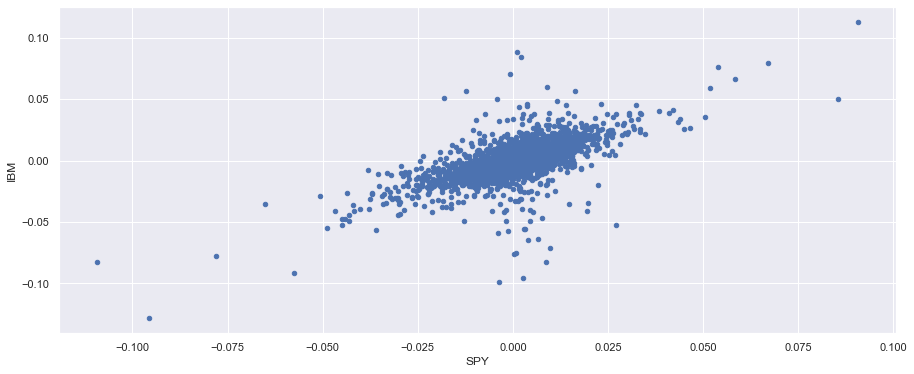

In [16]:
# Strangely, without color argument, we get a warning
pc.plot(x='SPY', y='IBM', kind='scatter', color='b')

<AxesSubplot:xlabel='SPY', ylabel='GLD'>

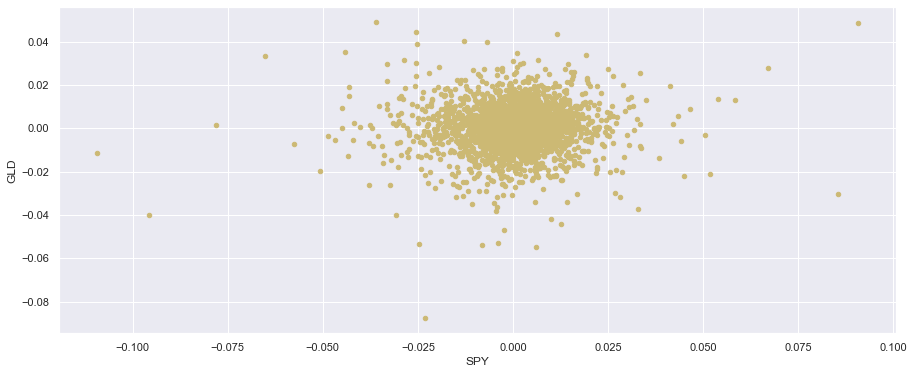

In [17]:
pc.plot(x='SPY', y='GLD', kind='scatter', color='y')

### Regression line

In [18]:
beta, alpha = np.polyfit(pc['SPY'], pc['IBM'], 1)

In [19]:
(beta, alpha)

(0.8478543096394201, -0.0002001865856536753)

In [20]:
pc['SPY'].min(), pc['SPY'].max()

(-0.10942352208432848, 0.09060330568080177)

In [21]:
x = np.linspace(pc['SPY'].min(), pc['SPY'].max(), 10)

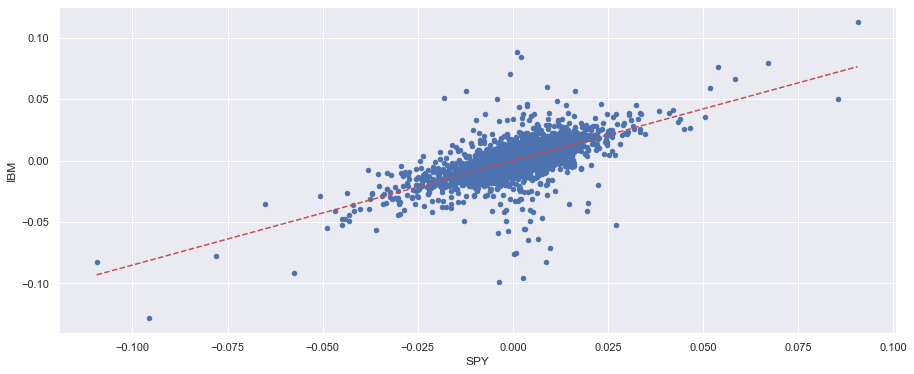

In [22]:
pc.plot(x='SPY', y='IBM', kind='scatter', color='b')
plt.plot(x, x * beta + alpha, linestyle='--', color='r')

In [23]:
def plot_correlation(df, s1, s2):
    beta, alpha = np.polyfit(df[s1], df[s2], 1)
    x = np.linspace(df[s1].min(), df[s1].max(), 20)
    df.plot(x=s1, y=s2, kind='scatter', color='b')
    plt.plot(x, x * beta + alpha, linestyle='--', color='r')
    return (beta, alpha)    

(0.9265005378531035, -6.547938766585156e-05)

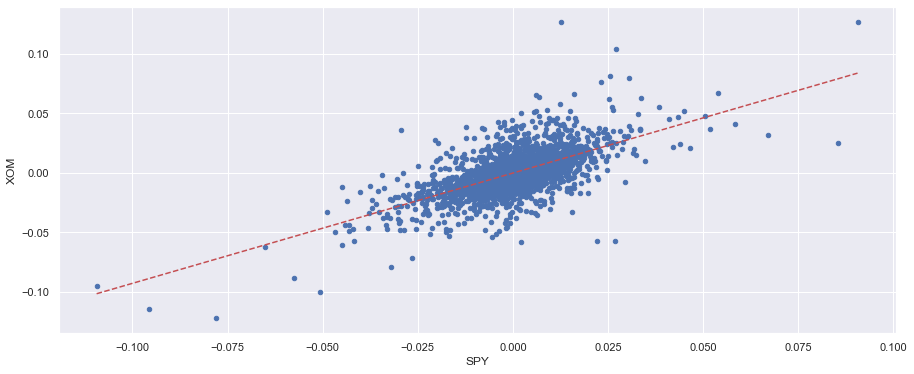

In [24]:
plot_correlation(pc, 'SPY', 'XOM')

(0.031055706061212794, 0.0001365378702081974)

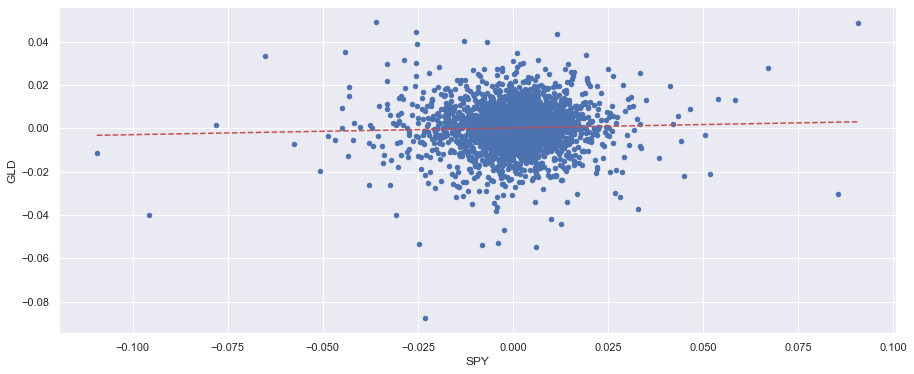

In [25]:
plot_correlation(pc, 'SPY', 'GLD')

## Correlation

In [26]:
pc.corr()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Close,,,,,,
AAPL,1.000000,0.047047,0.554145,0.409764,0.682896,0.330879
GLD,0.047047,1.000000,0.008926,0.018433,0.034682,0.058403
GOOG,0.554145,0.008926,1.000000,0.424006,0.702384,0.371763
IBM,0.409764,0.018433,0.424006,1.000000,0.659139,0.510014
SPY,0.682896,0.034682,0.702384,0.659139,1.000000,0.639751
XOM,0.330879,0.058403,0.371763,0.510014,0.639751,1.000000


In [27]:
pc.corr().min()

Close
AAPL    0.047047
GLD     0.008926
GOOG    0.008926
IBM     0.018433
SPY     0.034682
XOM     0.058403
dtype: float64

In [28]:
pc.corr().idxmin()

Close
AAPL     GLD
GLD     GOOG
GOOG     GLD
IBM      GLD
SPY      GLD
XOM      GLD
dtype: object

## My experimentations

### Is it normal distribution?

In [29]:
pc.iloc[0]

Close
AAPL    0.0
GLD     0.0
GOOG    0.0
IBM     0.0
SPY     0.0
XOM     0.0
Name: 2010-01-04 00:00:00, dtype: float64

In [30]:
r = pd.Series(np.random.randn(len(pc['SPY'])))
# 0 mean
r = r - r.mean()
# same std
r = r / r.std() * pc['SPY'].std()
# put back same mean
r = r + pc['SPY'].mean()
# same starting value
r[0] = 0.0

In [31]:
get_stat_info(r)

{'min': -0.040660434630012995,
 'max': 0.034206834521328604,
 'mean': 0.0004955408812615947,
 'std': 0.01102009934206963,
 'skew': -0.053941672412766636,
 'kurt': -0.18865672997152938}

In [32]:
get_stat_info(pc['SPY'])

{'min': -0.10942352208432848,
 'max': 0.09060330568080177,
 'mean': 0.0004936472958819979,
 'std': 0.011020708191751577,
 'skew': -0.5753187892018983,
 'kurt': 11.144186990335047}

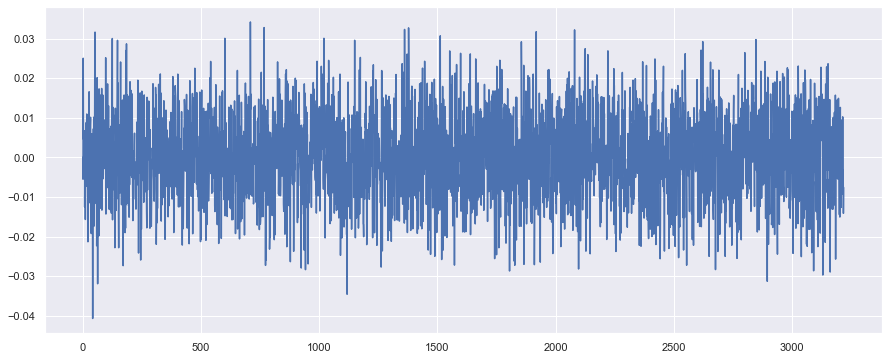

In [33]:
plt.plot(r)

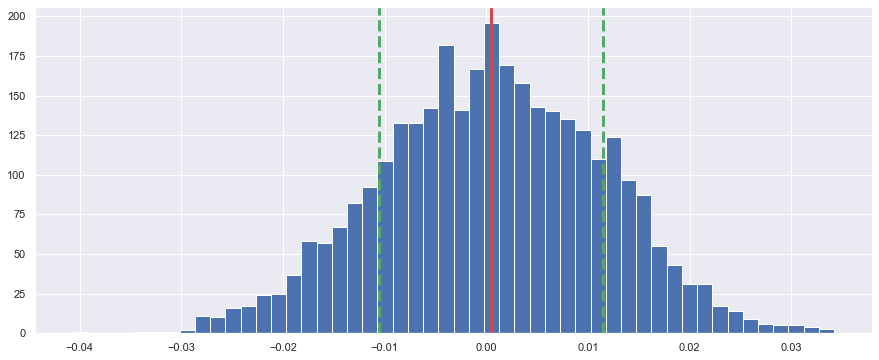

In [34]:
plot_histogram(r)

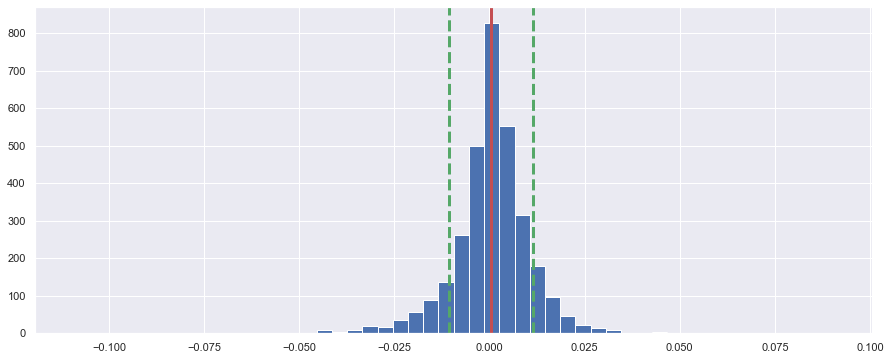

In [35]:
plot_histogram(pc['SPY'])

In [36]:
df['SPY'].iloc[0]

88.86036700000001

<AxesSubplot:>

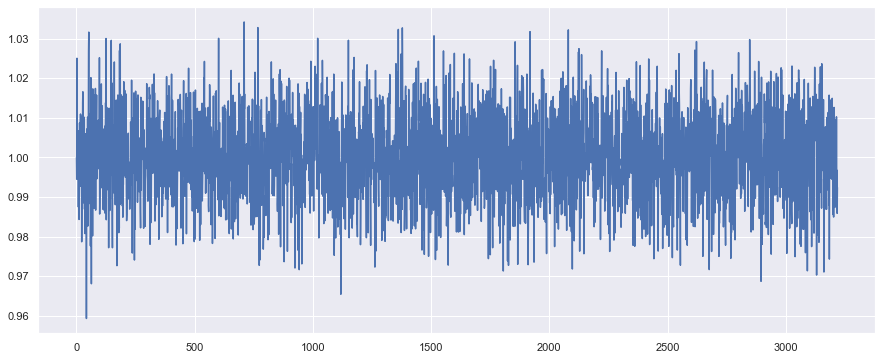

In [37]:
(r + 1).plot()

In [38]:
(r + 1).cumprod()

0       1.000000
1       0.994514
2       1.019418
3       1.024117
4       1.030964
          ...   
3214    4.193544
3215    4.155757
3216    4.142338
3217    4.083869
3218    4.052900
Length: 3219, dtype: float64

In [39]:
(pc['SPY'] + 1).cumprod()

Date
2010-01-04    1.000000
2010-01-05    1.002647
2010-01-06    1.003353
2010-01-07    1.007589
2010-01-08    1.010942
                ...   
2022-10-10    4.051525
2022-10-11    4.025867
2022-10-12    4.012588
2022-10-13    4.118484
2022-10-14    4.024629
Name: SPY, Length: 3219, dtype: float64

<AxesSubplot:xlabel='Date'>

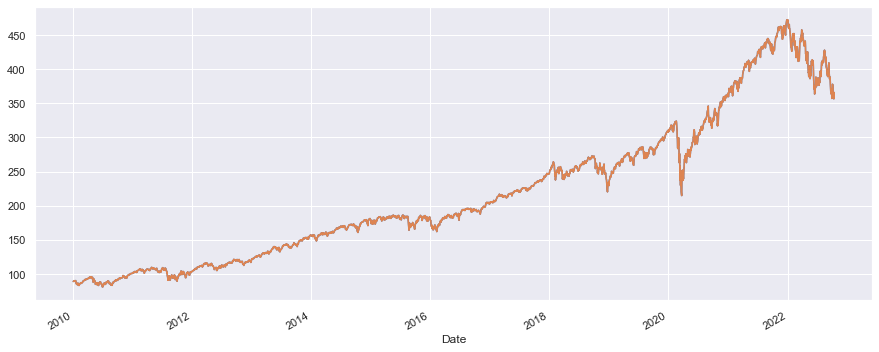

In [40]:
# Same chart reconstruction from % change
((pc['SPY'] + 1).cumprod() * df['SPY'].iloc[0]).plot()
df['SPY'].plot()

<AxesSubplot:>

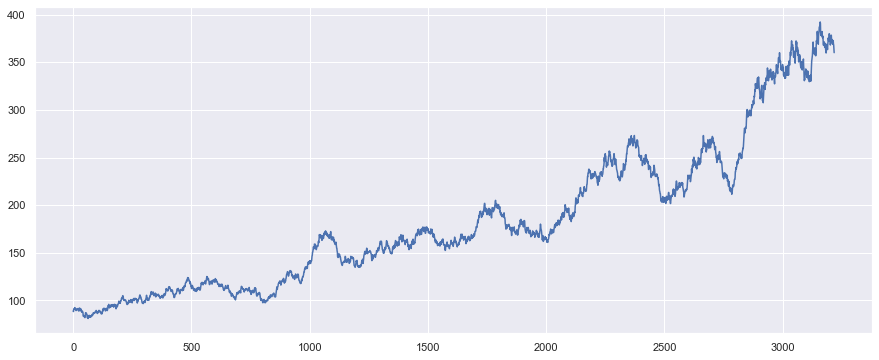

In [41]:
((r + 1).cumprod() * df['SPY'].iloc[0]).plot()

# Lesson 8

In [42]:
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
allocs = np.array([.4, .4, .1, .1])
start_val = 1000 # $
allocs.sum()

1.0

In [43]:
# Keep only the stocks we want:
df = df[symbols]

In [44]:
df.isna().any(1).any()

False

In [45]:
df.head()

Close,SPY,XOM,GOOG,GLD
Date,,,,
2010-01-04,88.860367,42.336414,15.610239,109.800003
2010-01-05,89.095604,42.501717,15.541497,109.699997
2010-01-06,89.158325,42.869049,15.149715,111.510002
2010-01-07,89.534714,42.734364,14.797037,110.820000
2010-01-08,89.832657,42.562935,14.994298,111.370003


## Portfolio value

<AxesSubplot:xlabel='Date'>

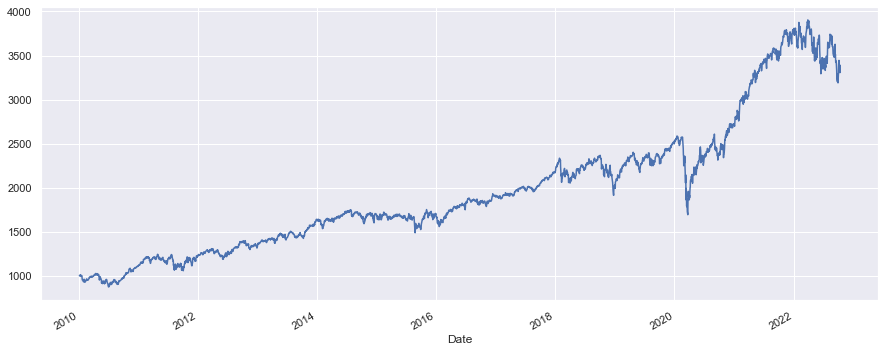

In [46]:
# Quick plot of our portfolio
port_val = ((df / df.iloc[0]) * allocs * start_val).sum(1)
port_val.plot()

## Daily returns

In [47]:
daily_rets = port_val.pct_change().iloc[1:]

<AxesSubplot:xlabel='Date'>

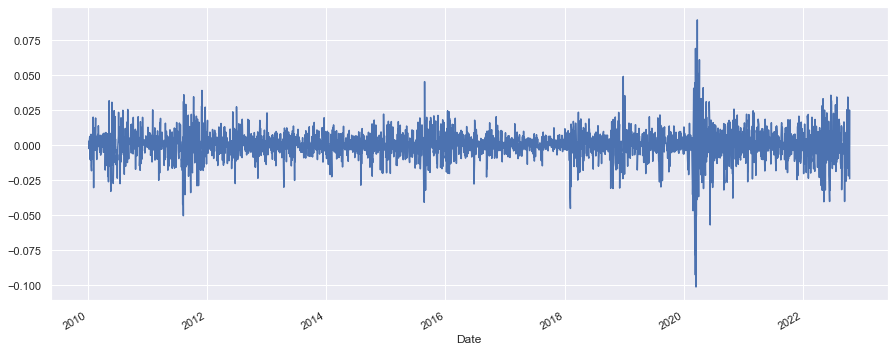

In [48]:
daily_rets.plot()

## Cumulative returns

In [49]:
(port_val[-1] / port_val[0]) - 1

2.3088779002943833

## Average daily returns

In [50]:
daily_rets.mean()

0.0004290229144997995

## Std dev daily returns

Also referred as risk.

In [51]:
daily_rets.std()

0.01066706143363454

## Sharpe ratio

Risk-free rate: approximated as zero.  Could vary depending on economic situation.

In [52]:
(daily_rets - 0).mean() / (daily_rets - 0).std()

0.04021940973800321

Note: there is 252 trading days per year.

In [53]:
len(df.loc['2010-01-01':'2010-12-31'])

252

In [54]:
np.sqrt(252)

15.874507866387544

k = sqrt(nb samples per years)

In [55]:
np.sqrt(252) * ((daily_rets - 0).mean() / (daily_rets - 0).std())

0.6384633362673958

In [56]:
# Test
np.sqrt(252) * (10./100/100 - 2./100/100) / (10./100/100)

12.699606293110037

## Combined

Function to get
* Cummulative return
* Average daily return
* Risk
* Sharpe ratio

In [57]:
def portfolio_param(port_val, nb_trading_day_per_year=252, risk_free_rate_of_return=0):
    daily_rets = port_val.pct_change()
    daily_rets.iloc[0] = 0

    daily_rf = np.power(1.0 + risk_free_rate_of_return, 1.0/nb_trading_day_per_year) - 1
    
    return {
        'Cummulative return': (port_val.iloc[-1] / port_val.iloc[0]) - 1,
        'Average daily return': daily_rets.mean(),
        'Risk': daily_rets.std(),
        'Sharpe ratio': np.sqrt(nb_trading_day_per_year) * ((daily_rets - daily_rf).mean() / (daily_rets - daily_rf).std())
    }

In [58]:
portfolio_param(port_val)

{'Cummulative return': 2.3088779002943833,
 'Average daily return': 0.00042888963617904776,
 'Risk': 0.010665406580014514,
 'Sharpe ratio': 0.6383640278744179}

# Trades test

<AxesSubplot:xlabel='Date'>

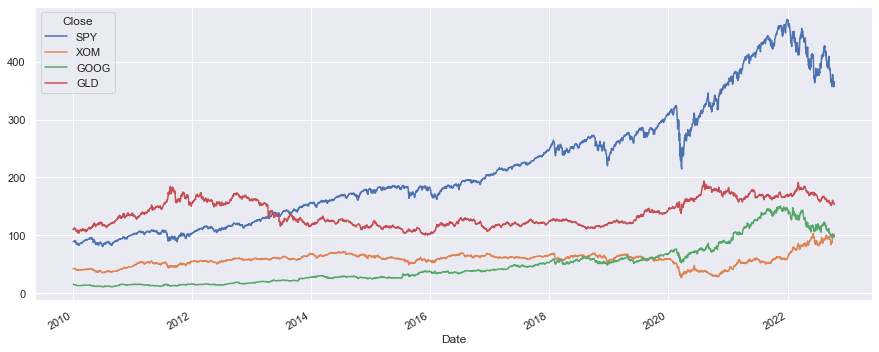

In [59]:
df.plot()

<AxesSubplot:xlabel='Date'>

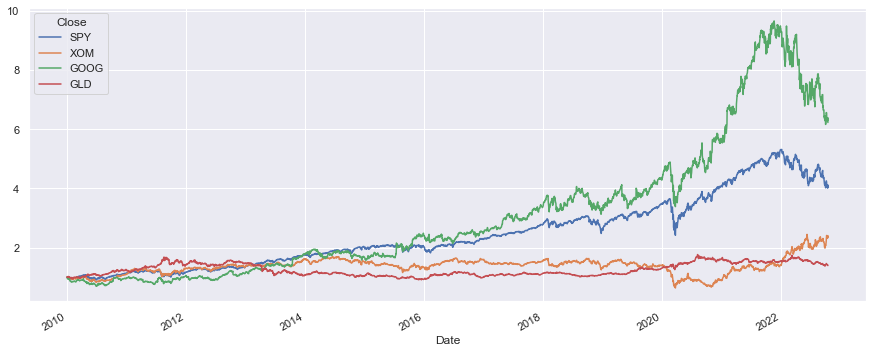

In [60]:
fu.normalize_data_frame(df).plot()

<AxesSubplot:xlabel='Date'>

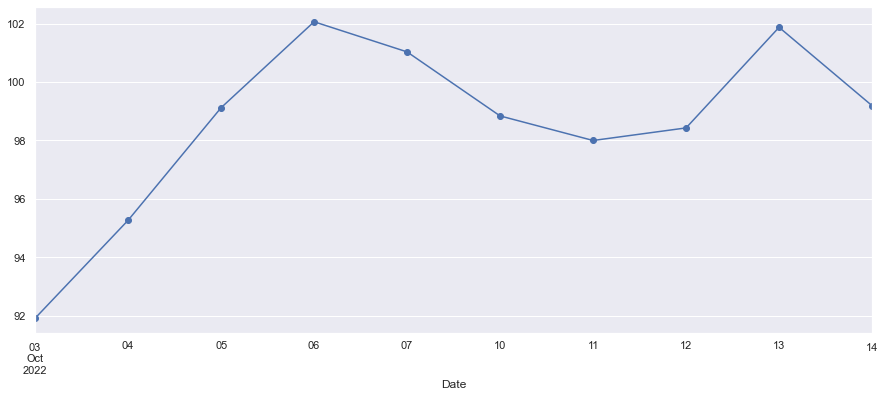

In [61]:
n = 10
df2 = df.iloc[-n:].loc[:, 'XOM']
df2.plot(marker='o')

In [62]:
df2.iloc[0]

91.91999799999999

In [63]:
df2.iloc[-1]

99.190002

In [64]:
(df2.iloc[-1] - df2.iloc[0]) / df2.iloc[0]

0.07909055872694878

In [65]:
df2.iloc[-1] / df2.iloc[0] - 1

0.07909055872694881

<AxesSubplot:xlabel='Date'>

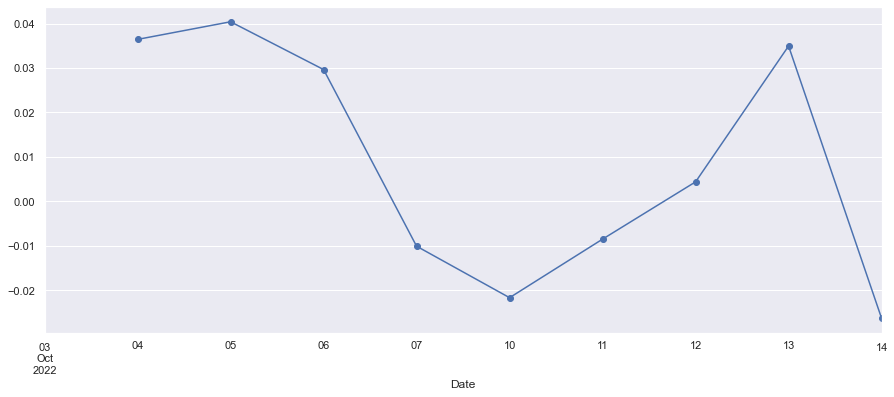

In [66]:
df2.pct_change().plot(marker='o')

In [67]:
(df2.pct_change() + 1).prod() - 1

0.07909055872694837

In [68]:
(df2.pct_change()[df2.pct_change() > 0] + 1).prod() - 1

0.15415939866246076

In [69]:
s = pd.Series([12, 10, 15, 13, 16], list('abcde'))
s

a    12
b    10
c    15
d    13
e    16
dtype: int64

<AxesSubplot:>

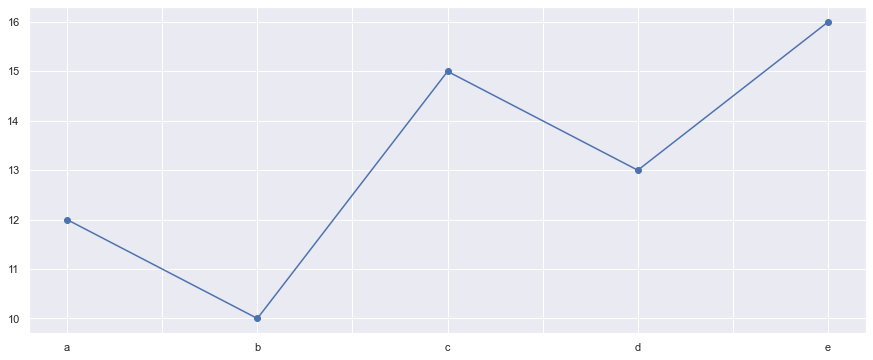

In [70]:
s.plot(marker='o')

In [71]:
s['e']/s['a']

1.3333333333333333

In [72]:
15/10. * 16 /13.

1.8461538461538463

In [73]:
(s.pct_change()[s.pct_change() > 0] + 1).prod() - 1

0.8461538461538463

In [74]:
# Real value
s = df.loc[:, 'GLD']

<AxesSubplot:xlabel='Date'>

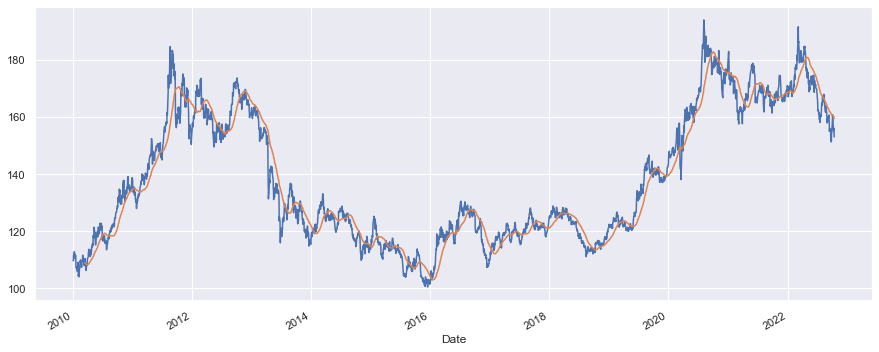

In [75]:
s.plot()
s.rolling(50).mean().plot()

In [76]:
s[-1] / s[0] - 1

0.39326039909124577

In [77]:
# If only trading positive days (theorical max cumulative return):
(s.pct_change()[s.pct_change() > 0] + 1).prod() - 1

102225.64679776772

# Lesson 9